In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming all singlegraph results are stored as CSV files in a directory
singlegraph_results = pd.concat([pd.read_csv('results_singlegraph_gaussian_COBYLA_multiangle_False_True_False_1.csv'),
pd.read_csv('results_singlegraph_uniform_COBYLA_multiangle_False_True_False_1.csv'),
pd.read_csv('results_singlegraph_uniform_gaussian_COBYLA_recursive_False_False_1.csv'),
pd.read_csv('results_singlegraph_uniform_gaussian_COBYLA_vanilla_False_True_False_1.csv')
], ignore_index=True)

singlegraph_results.to_csv('singlegraph_results_depth1.csv')
def warmstartconv(str):
    return 'warmstart' if str else 'regstart'
# Calculate the percent of optimal solution
singlegraph_results['percent_optimal'] = (singlegraph_results['quantum_obj_value'] / singlegraph_results['classic_value']) * 100
# Display the concatenated results
singlegraph_results.head()


,Unnamed: 0,param_initialization,optimizer,qaoa_variant,warm_start,errors,depth,graph_size,graph_name,time_elapsed,quantum_func_evals,obj_func_evolution,quantum_solution,quantum_obj_value,classic_solution,classic_value,percent_optimal
0,0,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,15.955351,155,"[array(0.16403546), array(0.09454393), array(-...","[1, 1, 0, 1, 0, 0, 1]",5.442387,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637,80.432894
1,1,gaussian,COBYLA,multiangle,True,False,1,7,F?~vw,12.627668,121,"[array(0.02970452), array(0.20433072), array(0...","[1, 1, 0, 1, 1, 0, 0]",4.293020,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637,63.446423
2,2,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,15.367194,148,"[array(-0.15251974), array(-0.05815718), array...","[1, 1, 1, 1, 0, 0, 0]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637,100.000000
3,3,gaussian,COBYLA,multiangle,True,False,1,7,F?~vw,15.906112,155,"[array(-0.15542798), array(-0.17905445), array...","[1, 1, 1, 1, 0, 0, 0]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637,100.000000
4,4,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,18.153775,177,"[array(-0.01093279), array(-0.18794926), array...","[0, 0, 0, 0, 1, 1, 1]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637,100.000000


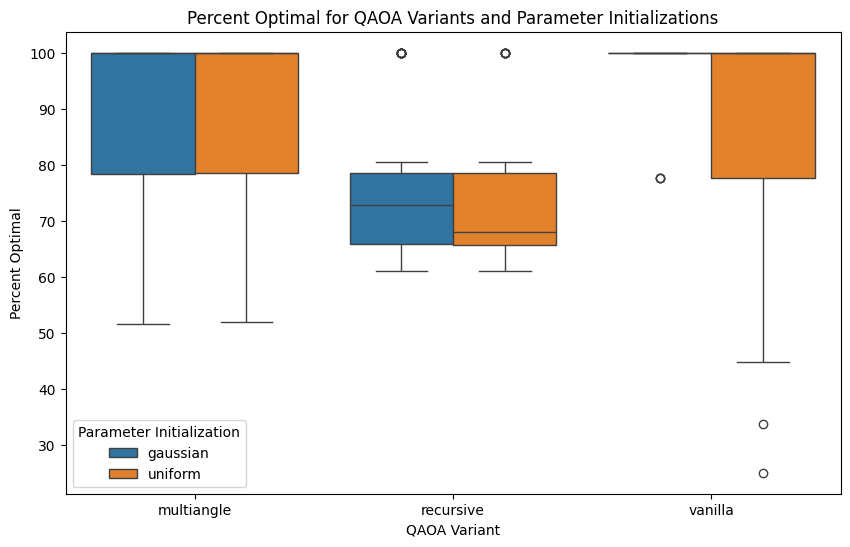

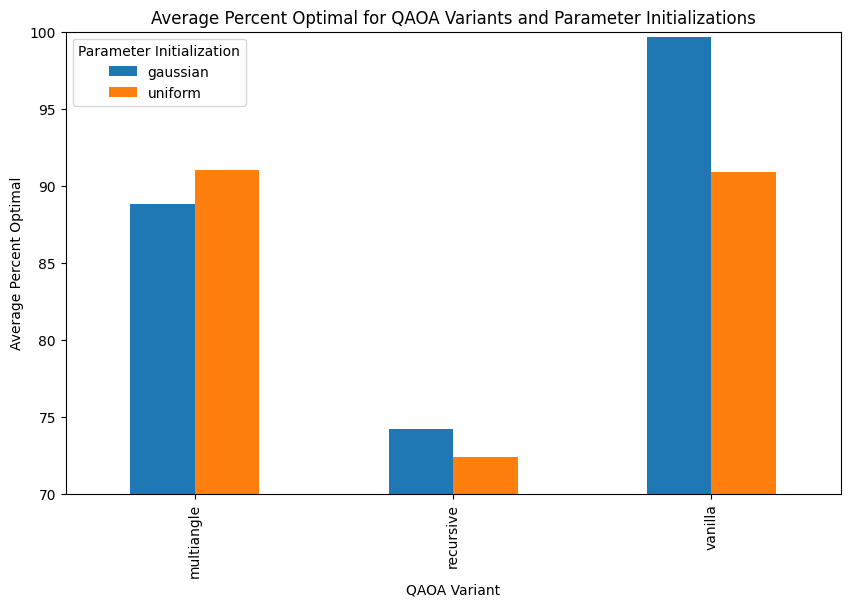

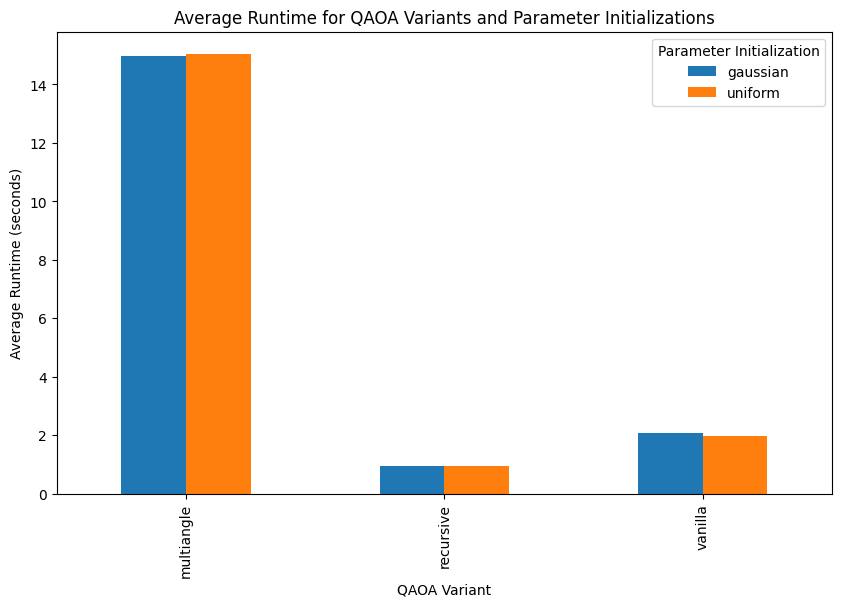

In [9]:


# Calculate the average percent_optimal for each combination of qaoa_variant and param_initialization
avg_percent_optimal = singlegraph_results.groupby(['qaoa_variant', 'param_initialization'])['percent_optimal'].mean().unstack()

# Plot the results using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='percent_optimal', hue='param_initialization', data=singlegraph_results)
plt.title('Percent Optimal for QAOA Variants and Parameter Initializations')
plt.xlabel('QAOA Variant')
plt.ylabel('Percent Optimal')
plt.legend(title='Parameter Initialization')
plt.show()

# Plot the average percent_optimal using a bar plot
avg_percent_optimal.plot(kind='bar', figsize=(10, 6))
plt.title('Average Percent Optimal for QAOA Variants and Parameter Initializations')
plt.xlabel('QAOA Variant')
plt.ylim(70,100)
plt.ylabel('Average Percent Optimal')
plt.legend(title='Parameter Initialization')
plt.show()

# Plot the runtime results using seaborn boxplot
# Calculate the average runtime for each combination of qaoa_variant and param_initialization
avg_runtime = singlegraph_results.groupby(['qaoa_variant', 'param_initialization'])['time_elapsed'].mean().unstack()

# Plot the average runtime using a bar plot
avg_runtime.plot(kind='bar', figsize=(10, 6))
plt.title('Average Runtime for QAOA Variants and Parameter Initializations')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Runtime (seconds)')
plt.legend(title='Parameter Initialization')
plt.show()


<Figure size 1000x600 with 0 Axes>

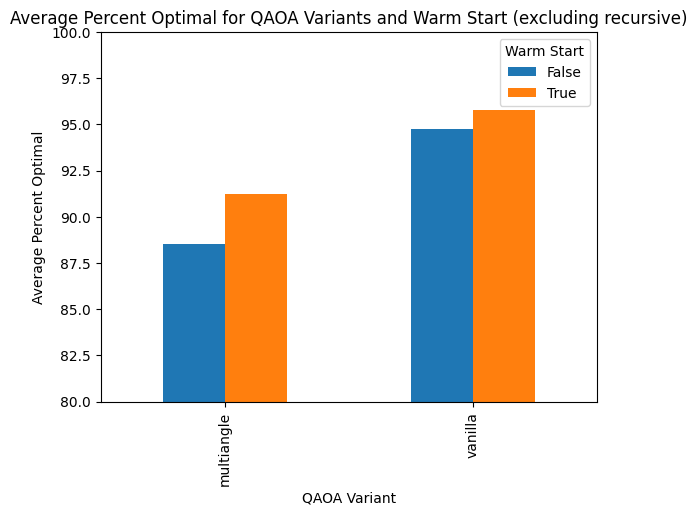

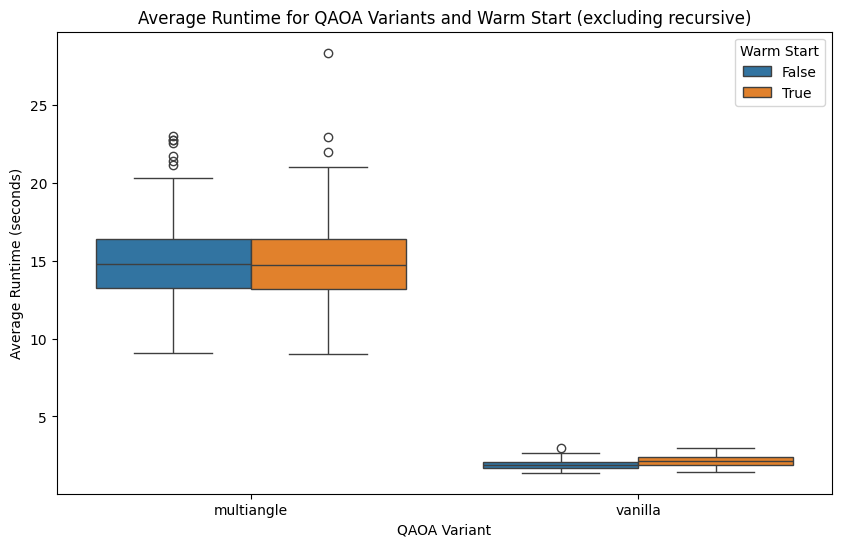

In [7]:
# Filter out the recursive variant
filtered_results = singlegraph_results[singlegraph_results['qaoa_variant'] != 'recursive']

# Calculate the average percent_optimal for each combination of warm_start and qaoa_variant
avg_percent_optimal_filtered = filtered_results.groupby(['qaoa_variant', 'warm_start'])['percent_optimal'].mean().unstack()

# Plot the average percent_optimal using seaborn boxplot
plt.figure(figsize=(10, 6))
avg_percent_optimal_filtered.plot(kind='bar')
plt.title('Average Percent Optimal for QAOA Variants and Warm Start (excluding recursive)')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Percent Optimal')
plt.ylim(80, 100)
plt.legend(title='Warm Start')
plt.show()

# Plot the average runtime using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='time_elapsed', hue='warm_start', data=filtered_results)
plt.title('Average Runtime for QAOA Variants and Warm Start (excluding recursive)')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Runtime (seconds)')
plt.legend(title='Warm Start')
plt.show()


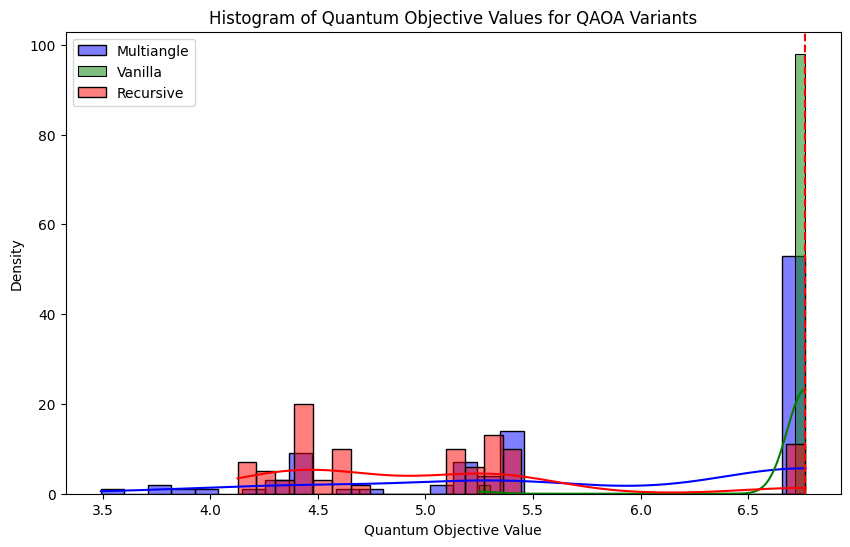

In [17]:
# Filter the results for qaoa_variant 'multiangle', 'vanilla', and 'recursive'

singlegraph_results = singlegraph_results[(singlegraph_results['param_initialization'] == 'gaussian') & (singlegraph_results['warm_start'] == False)]
multiangle_results = singlegraph_results[singlegraph_results['qaoa_variant'] == 'multiangle']
vanilla_results = singlegraph_results[singlegraph_results['qaoa_variant'] == 'vanilla']
recursive_results = singlegraph_results[singlegraph_results['qaoa_variant'] == 'recursive']

# Plot the histogram of quantum objective values with bins
plt.figure(figsize=(10, 6))
sns.histplot(multiangle_results['quantum_obj_value'], bins=30, kde=True, label='Multiangle', color='blue')
sns.histplot(vanilla_results['quantum_obj_value'], bins=30, kde=True, label='Vanilla', color='green')
sns.histplot(recursive_results['quantum_obj_value'], bins=30, kde=True, label='Recursive', color='red')
plt.axvline(x=6.76637017433752, color='red', linestyle='--')
plt.title('Histogram of Quantum Objective Values for QAOA Variants')
plt.xlabel('Quantum Objective Value')
plt.ylabel('Density')
plt.legend()
plt.show()

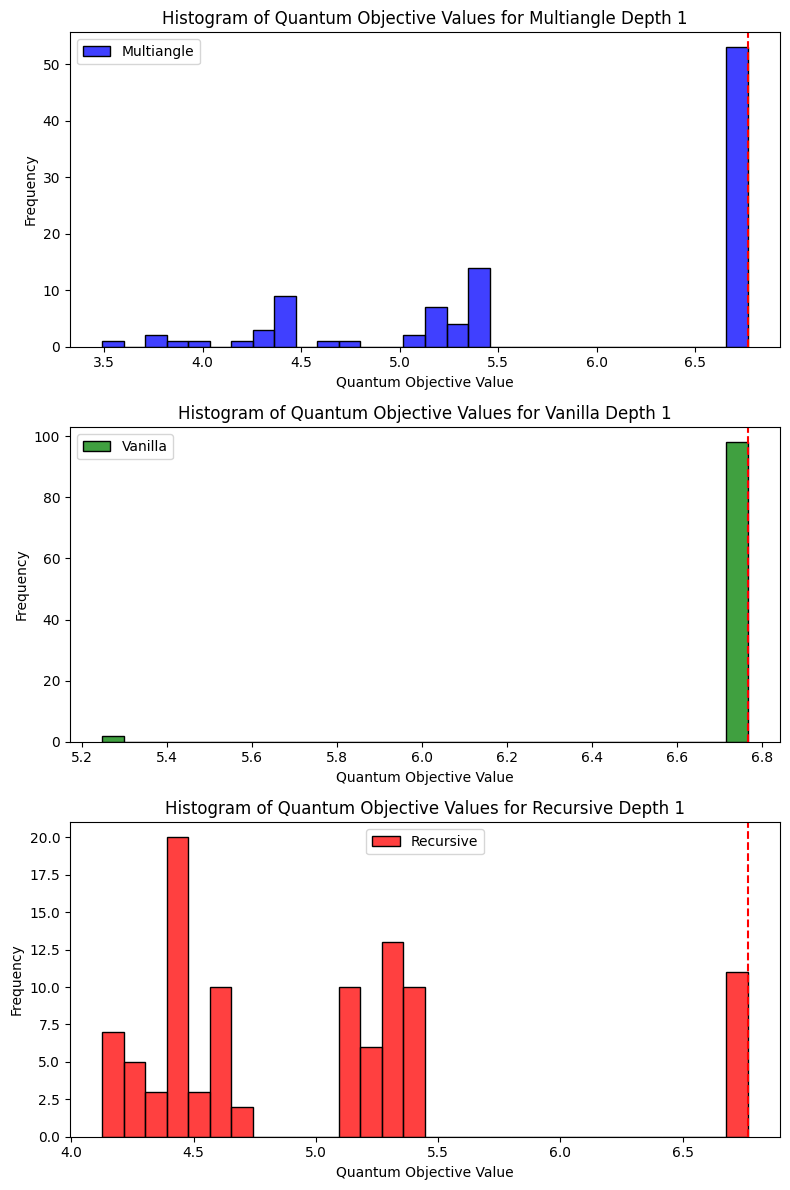

In [18]:
# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot the histogram of quantum objective values for multiangle
sns.histplot(multiangle_results['quantum_obj_value'], bins=30, kde=False, label='Multiangle', color='blue', ax=axes[0])
axes[0].axvline(x=6.76637017433752, color='red', linestyle='--')
axes[0].set_title('Histogram of Quantum Objective Values for Multiangle Depth 1')
axes[0].set_xlabel('Quantum Objective Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot the histogram of quantum objective values for vanilla
sns.histplot(vanilla_results['quantum_obj_value'], bins=30, kde=False, label='Vanilla', color='green', ax=axes[1])
axes[1].axvline(x=6.76637017433752, color='red', linestyle='--')
axes[1].set_title('Histogram of Quantum Objective Values for Vanilla Depth 1')
axes[1].set_xlabel('Quantum Objective Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Plot the histogram of quantum objective values for recursive
sns.histplot(recursive_results['quantum_obj_value'], bins=30, kde=False, label='Recursive', color='red', ax=axes[2])
axes[2].axvline(x=6.76637017433752, color='red', linestyle='--')
axes[2].set_title('Histogram of Quantum Objective Values for Recursive Depth 1')
axes[2].set_xlabel('Quantum Objective Value')
axes[2].set_ylabel('Frequency')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
depth_results = pd.concat([pd.read_csv('results_singlegraph_gaussian_COBYLA_multiangle_False_False_1_3.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_multiangle_False_False_5.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_recursive_False_False_1_3_5.csv'),
pd.read_csv('results_singlegraph_gaussian_COBYLA_vanilla_False_False_1_3_5.csv')
], ignore_index=True)
depth_results.to_csv('singlegraph_results_depth1_3_5.csv')
depth_results.head()

,Unnamed: 0,param_initialization,optimizer,qaoa_variant,warm_start,errors,depth,graph_size,graph_name,time_elapsed,quantum_func_evals,obj_func_evolution,quantum_solution,quantum_obj_value,classic_solution,classic_value
0,0,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,16.642864,159,"[array(-0.0982533), array(-0.04873695), array(...","[0, 0, 0, 0, 1, 1, 1]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
1,1,gaussian,COBYLA,multiangle,False,False,3,7,F?~vw,58.539218,441,"[array(-0.15019596), array(-0.04434831), array...","[0, 0, 0, 0, 1, 1, 1]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
2,2,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,15.137011,146,"[array(0.13603586), array(-0.05829575), array(...","[1, 1, 1, 1, 0, 0, 0]",6.766370,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
3,3,gaussian,COBYLA,multiangle,False,False,3,7,F?~vw,50.063641,367,"[array(0.02853377), array(0.00871353), array(-...","[1, 1, 0, 1, 0, 0, 1]",5.442387,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637
4,4,gaussian,COBYLA,multiangle,False,False,1,7,F?~vw,16.279710,159,"[array(-0.02515338), array(0.14838463), array(...","[0, 0, 1, 0, 1, 1, 0]",5.442387,"[1.0, 1.0, 1.0, 1.0, 0, 0, 0]",6.76637


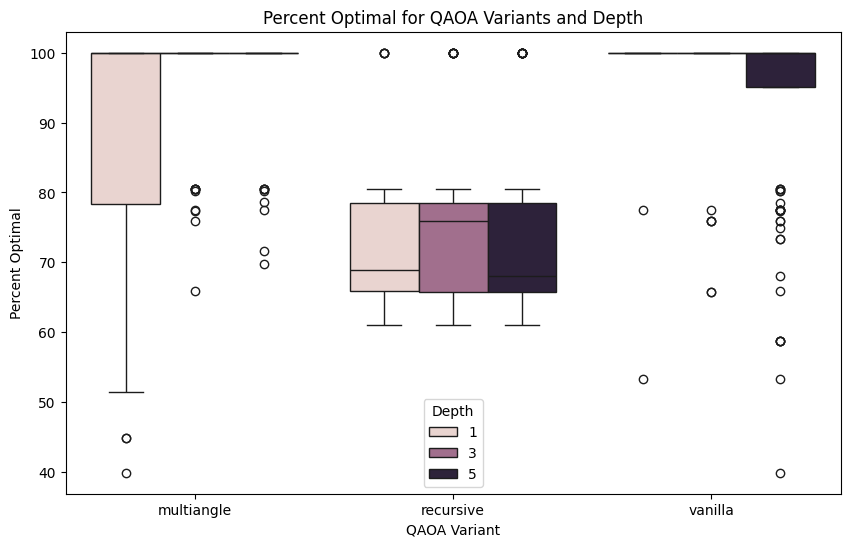

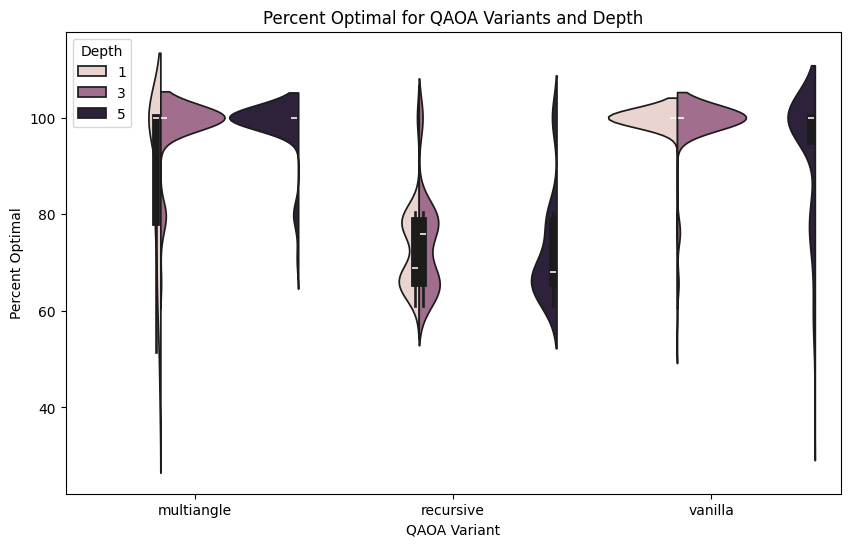

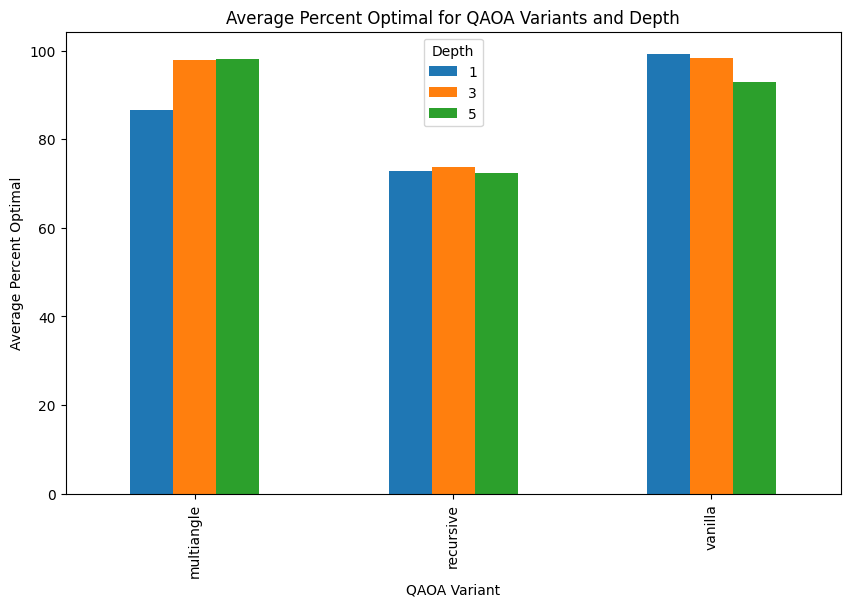

In [12]:
depth_results['percent_optimal'] = (depth_results['quantum_obj_value'] / depth_results['classic_value']) * 100

# Plot the results using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='qaoa_variant', y='percent_optimal', hue='depth', data=depth_results)
plt.title('Percent Optimal for QAOA Variants and Depth')
plt.xlabel('QAOA Variant')
plt.ylabel('Percent Optimal')
plt.legend(title='Depth')
plt.show()

# Plot the results using seaborn violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='qaoa_variant', y='percent_optimal', hue='depth', data=depth_results, split=True)
plt.title('Percent Optimal for QAOA Variants and Depth')
plt.xlabel('QAOA Variant')
plt.ylabel('Percent Optimal')
plt.legend(title='Depth')
plt.show()

# Calculate the average percent_optimal for each combination of qaoa_variant and depth
avg_percent_optimal_depth = depth_results.groupby(['qaoa_variant', 'depth'])['percent_optimal'].mean().unstack()

# Plot the average percent_optimal using a bar plot
avg_percent_optimal_depth.plot(kind='bar', figsize=(10, 6))
plt.title('Average Percent Optimal for QAOA Variants and Depth')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Percent Optimal')
plt.legend(title='Depth')
plt.show()

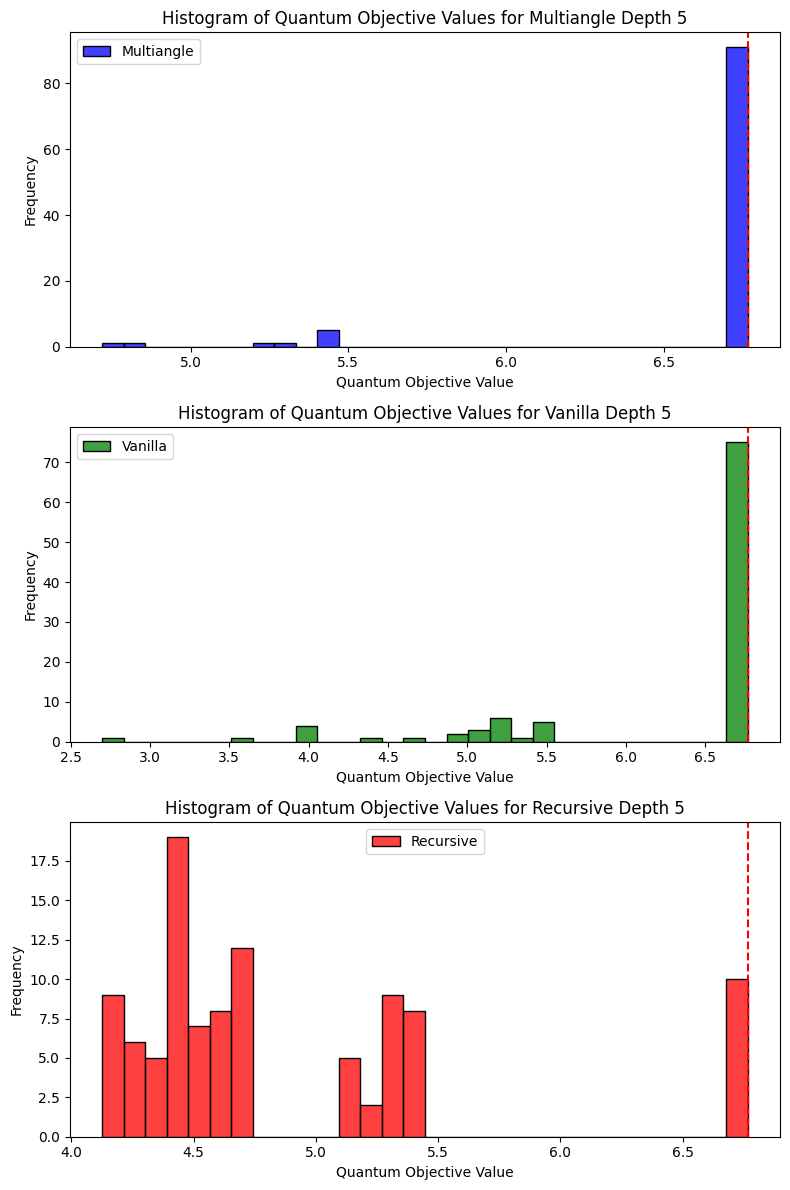

In [15]:
# Filter the results for depth 5
depth_5_results = depth_results[depth_results['depth'] == 5]

# Filter the results for qaoa_variant 'multiangle', 'vanilla', and 'recursive'
multiangle_results_depth_5 = depth_5_results[depth_5_results['qaoa_variant'] == 'multiangle']
vanilla_results_depth_5 = depth_5_results[depth_5_results['qaoa_variant'] == 'vanilla']
recursive_results_depth_5 = depth_5_results[depth_5_results['qaoa_variant'] == 'recursive']

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot the histogram of quantum objective values for multiangle
sns.histplot(multiangle_results_depth_5['quantum_obj_value'], bins=30, kde=False, label='Multiangle', color='blue', ax=axes[0])
axes[0].axvline(x=6.76637017433752, color='red', linestyle='--')
axes[0].set_title('Histogram of Quantum Objective Values for Multiangle Depth 5')
axes[0].set_xlabel('Quantum Objective Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot the histogram of quantum objective values for vanilla
sns.histplot(vanilla_results_depth_5['quantum_obj_value'], bins=30, kde=False, label='Vanilla', color='green', ax=axes[1])
axes[1].axvline(x=6.76637017433752, color='red', linestyle='--')
axes[1].set_title('Histogram of Quantum Objective Values for Vanilla Depth 5')
axes[1].set_xlabel('Quantum Objective Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Plot the histogram of quantum objective values for recursive
sns.histplot(recursive_results_depth_5['quantum_obj_value'], bins=30, kde=False, label='Recursive', color='red', ax=axes[2])
axes[2].axvline(x=6.76637017433752, color='red', linestyle='--')
axes[2].set_title('Histogram of Quantum Objective Values for Recursive Depth 5')
axes[2].set_xlabel('Quantum Objective Value')
axes[2].set_ylabel('Frequency')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()